In [82]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from pandas import ExcelWriter
from pandas import ExcelFile
from pprint import pprint
from scipy.stats import linregress
from datetime import timedelta

In [83]:
fileordprod = "./data/brazilian-ecommerce/olist_order_items_dataset.csv"
fileordcusttime = "./data/brazilian-ecommerce/olist_orders_dataset.csv"
fileprodcat = "./data/brazilian-ecommerce/olist_products_dataset.csv"
fileprodtransl = "./data/brazilian-ecommerce/product_category_name_translation.csv"
filecustzip = "./data/brazilian-ecommerce/olist_customers_dataset.csv"
filezipcoord = "./data/brazilian-ecommerce/olist_geolocation_dataset.csv"

# Read Purchasing File and store into Pandas data frame
ordprod = pd.read_csv(fileordprod)#[['order_id', 'product_id', 'price']]
ordcusttime= pd.read_csv(fileordcusttime)#[['order_id', 'customer_id', 'order_purchase_timestamp']]
prodcat = pd.read_csv(fileprodcat)#[['product_id', 'product_category_name']]
prodtransl = pd.read_csv(fileprodtransl)
custzip = pd.read_csv(filecustzip)[['customer_id','customer_zip_code_prefix']]
zipcoord = pd.read_csv(filezipcoord)[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

zipcoord = zipcoord.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}).drop_duplicates(subset = 'customer_zip_code_prefix')




mergedf = pd.merge(ordcusttime, ordprod, on = 'order_id',how= 'left')
mergedf = pd.merge(mergedf, prodcat, on = 'product_id', how = 'left')
mergedf = pd.merge(mergedf, prodtransl, on = 'product_category_name', how = 'left')
mergedf = pd.merge(mergedf, custzip, on = 'customer_id', how = 'left')
mergedf = pd.merge(mergedf, zipcoord, on = 'customer_zip_code_prefix' , how = 'left')

renamecolumns = {
    'order_purchase_timestamp': 'order_time',
    'product_category_name_english': 'category'
}
mergedf = mergedf.rename(columns = renamecolumns)


#minus one day
mergedf["date_time"]= pd.to_datetime(mergedf['order_time']) - timedelta(days=1)

mergedf['city'] = ''
mergedf['citylon'] = ''
mergedf['citylat'] = ''

#converted to MM/YY Format
mergedf['YYYY'] = pd.DatetimeIndex(mergedf['date_time']).year
mergedf['MM'] = pd.DatetimeIndex(mergedf['date_time']).month

mergedf['month'] = pd.to_datetime(mergedf['date_time'])
mergedf['day'] = mergedf['month'].dt.strftime('%m/%d/%y')
mergedf['month'] = mergedf['month'].dt.strftime('%m/%y')
print(mergedf.shape)
mergedf

(113425, 34)


,order_id,customer_id,order_status,order_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,geolocation_lat,geolocation_lng,date_time,city,citylon,citylat,YYYY,MM,month,day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,-23.574809,-46.587471,2017-10-01 10:56:33,,,,2017,10,10/17,10/01/17
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,-12.169860,-44.988369,2018-07-23 20:41:37,,,,2018,7,07/18,07/23/18
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,-16.746337,-48.514624,2018-08-07 08:38:49,,,,2018,8,08/18,08/07/18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,-5.767733,-35.275467,2017-11-17 19:28:06,,,,2017,11,11/17,11/17/17
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,-23.675037,-46.524784,2018-02-12 21:18:39,,,,2018,2,02/18,02/12/18
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1.0,060cb19345d90064d1015407193c233d,...,-23.548581,-50.550660,2017-07-08 21:57:05,,,,2017,7,07/17,07/08/17
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1.0,a1804276d9941ac0733cfd409f5206eb,...,-27.855758,-54.447381,2017-04-10 12:22:08,,,,2017,4,04/17,04/10/17
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1.0,4520766ec412348b8d4caa5e8a18c464,...,-22.800936,-43.424861,2017-05-15 13:10:30,,,,2017,5,05/17,05/15/17
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1.0,ac1789e492dcd698c5c10b97a671243a,...,-27.420763,-52.674188,2017-01-22 18:29:09,,,,2017,1,01/17,01/22/17
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1.0,9a78fb9862b10749a117f7fc3c31f051,...,-23.478754,-47.467931,2017-07-28 11:55:02,,,,2017,7,07/17,07/28/17


In [69]:
# weatherurl = 'http://api.openweathermap.org/data/2.5/weather?'
# weatherapikey = 'b457821be7196c46ce037583b6f2feb4'
# for index, row in mergedf.iterrows():
#     latitude = mergedf.loc[mergedf.index[index],'geolocation_lat']
#     longitude = mergedf.loc[mergedf.index[index],'geolocation_lng']
    
#     params = {
#     'lon': longitude,
#     'lat': latitude,
#     'appid': weatherapikey
#     }
    
#     cityresponse = requests.get(weatherurl, params = params).json()
    
#     mergedf.loc[index, 'city'] = cityresponse['name']
    
#     if index % 500 == 0:
#         print(index, 'city')

# weatherurl = 'http://api.openweathermap.org/data/2.5/weather?'
# weatherapikey = 'b457821be7196c46ce037583b6f2feb4'
# for index, row in mergedf.iterrows():
#     city = mergedf.loc[mergedf.index[index],'city']
    
#     params = {
#     'q': city,
#     'appid': weatherapikey
#     }
    
#     cityresponse = requests.get(weatherurl, params = params).json()
#     mergedf.loc[index, 'citylon'] = cityresponse['coord']['lon']
#     mergedf.loc[index, 'citylat'] = cityresponse['coord']['lat']
#     if index % 500 == 0:
#         print(index, 'citylon & citylat')
    
# mergedf.to_csv('MergeDF.csv')


In [84]:
print(min(mergedf['geolocation_lng']) - max(mergedf['geolocation_lng']))
print(min(mergedf['geolocation_lat']))
print(max(mergedf['geolocation_lat']))
np.arange(min(mergedf['geolocation_lng']), max(mergedf['geolocation_lng']))
np.arange(min(mergedf['geolocation_lat']), max(mergedf['geolocation_lat']))

-64.08885053080984
-36.6053744107061
42.18400274298598


array([-36.60537441, -35.60537441, -34.60537441, -33.60537441,
       -32.60537441, -31.60537441, -30.60537441, -29.60537441,
       -28.60537441, -27.60537441, -26.60537441, -25.60537441,
       -24.60537441, -23.60537441, -22.60537441, -21.60537441,
       -20.60537441, -19.60537441, -18.60537441, -17.60537441,
       -16.60537441, -15.60537441, -14.60537441, -13.60537441,
       -12.60537441, -11.60537441, -10.60537441,  -9.60537441,
        -8.60537441,  -7.60537441,  -6.60537441,  -5.60537441,
        -4.60537441,  -3.60537441,  -2.60537441,  -1.60537441,
        -0.60537441,   0.39462559,   1.39462559,   2.39462559,
         3.39462559,   4.39462559,   5.39462559,   6.39462559,
         7.39462559,   8.39462559,   9.39462559,  10.39462559,
        11.39462559,  12.39462559,  13.39462559,  14.39462559,
        15.39462559,  16.39462559,  17.39462559,  18.39462559,
        19.39462559,  20.39462559,  21.39462559,  22.39462559,
        23.39462559,  24.39462559,  25.39462559,  26.39

In [85]:
stepsize = 1
for x in range(0, 10, stepsize):
    for y in range(0, 10, stepsize):
        print(x,y)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9


In [ ]:
range?


In [86]:
urlBOV = "https://www.quandl.com/api/v3/datasets/BCB/7.json?api_key=2vRuu5GNchksqBdcAHzc"
responseBOV = requests.get(urlBOV).json()


In [87]:
days = 10

BOV_df = pd.DataFrame(responseBOV['dataset']['data'])

BOV_df = BOV_df.rename(index=str, columns={0: "day", 1: "BOV"})

BOV_df['day'] = pd.to_datetime(BOV_df['day'])
BOV_df['day'] = BOV_df['day'].dt.strftime('%m/%d/%y')
BOV_df['BOV'] = pd.to_numeric(BOV_df['BOV'])
BOV_df = BOV_df.sort_values(by = 'day', ascending = True)
BOV_df['BOVdiff'] = BOV_df['BOV'].diff(periods = days)
BOV_df['BOVma'] = BOV_df['BOV'].rolling(window = days).mean()
BOV_df.head(20)

metriclist = ['BOV', 'BOVdiff', 'BOVma']
mergedf = pd.merge(mergedf, BOV_df, on = 'day', how = 'left')

In [ ]:
# mergedf['day'] = pd.to_datetime(mergedf['day']) - 1


In [ ]:
#mergedf['category'].unique()

In [88]:
new_categories = {'fashion_clothing': ['perfumery', 'luggage_accessories','watches_gifts','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'],
                  'home_furniture': ['housewares','art','arts_and_craftmanship','furniture_decor','office_furniture','bed_bath_table','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_comfort_2','furniture_mattress_and_upholstery'],
                  'construction_tools': ['garden_tools','construction_tools_construction','construction_tools_lights','construction_tools_garden','construction_tools_safety','home_construction','construction_tools_tools'],
                  'electronics': ['computers_accessories','telephony','electionics','cds_dvds_musicals','consoles_games','audio','tablets_printing_image','computers','dvds_blu_ray','music'],
                  'food_drink': ['food','drinks','food_drink','la_cuisine'],
                  'books': ['books_general_interest','books_imported','books_technical'],
                  'appliances': ['air_conditioning','small_appliances','home_appliances','home_appliances_2','small_appliances_home_oven_and_coffee'],
                    'auto': ['auto'],
                    'industry':['agro_industry_and_commerce','industry_commerce_and_business'],
                    'other':['pet_shop','stationary','toys','baby','cool_stuff','sports_leisure','diapers_and_hygeine','signaling_and_security','party_supplies','cine_photo','market_place','musical_instruments','christmas_supplies']}
                    
new_dict = {}
for key,valuelist in new_categories.items():
    for v in valuelist:
        new_dict[v] = key



In [89]:
mergedf['category'] = mergedf.category.replace(new_dict)

In [90]:
#Rid of black friday
mergedf = mergedf.loc[mergedf['day'] != '11/24/17']

In [73]:
#commented out because it lags when rerunning all 

#save to excel file 

# writer = ExcelWriter('output.xlsx')
# mergedf.to_excel(writer,'Sheet1',index=False)
# writer.save()

In [91]:
home_furniture = mergedf['price'][mergedf['category']=='home_furniture'].sum()
fashion_clothing = mergedf['price'][mergedf['category']=='fashion_clothing'].sum()
construction_tools = mergedf['price'][mergedf['category']=='construction_tools'].sum()
electronics = mergedf['price'][mergedf['category']=='electronics'].sum()
food_drink = mergedf['price'][mergedf['category']=='food_drink'].sum()
books = mergedf['price'][mergedf['category']=='books'].sum()
appliances = mergedf['price'][mergedf['category']=='appliances'].sum()

auto = mergedf['price'][mergedf['category']=='auto'].sum()
industry = mergedf['price'][mergedf['category']=='industry'].sum()
other = mergedf['price'][mergedf['category']=='other'].sum()
#data['duration'][data['item'] == 'call'].sum()

total_spend = home_furniture + fashion_clothing + construction_tools + electronics + food_drink + books + appliances + auto + industry + other

category_spend = {home_furniture:'home_furniture',
                        fashion_clothing:'fashion_clothing',
                        construction_tools:'construction_tools',
                        electronics:'electronics',
                        food_drink:'food_drink',
                        books:'books',
                        appliances:'appliances',
                        auto:'auto',
                        appliances:'industry',
                        other:'other'
                       }

In [92]:
mergedf['category'].nunique()

19

In [93]:
print(category_spend)

{2814014.9899999998: 'home_furniture', 1939501.21: 'fashion_clothing', 789713.5900000001: 'construction_tools', 1838155.98: 'electronics', 69011.58: 'food_drink', 70172.79: 'books', 485325.04000000004: 'industry', 591294.16: 'auto', 2980478.46: 'other'}


In [94]:
print(total_spend)

11689867.879999999


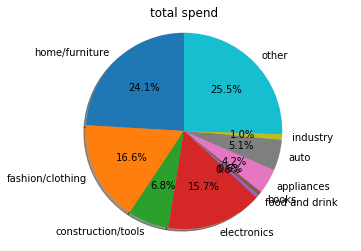

In [95]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'home/furniture', 'fashion/clothing', 'construction/tools', 'electronics','food and drink','books','appliances', 'auto', 'industry', 'other'
sizes = [home_furniture, fashion_clothing, construction_tools, electronics, food_drink, books, appliances, auto, industry, other]
explode = (0, 0, 0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('total spend')
plt.show()

In [96]:
#Black Friday!
mergedf.loc[mergedf['day'] == '11/24/17']

,order_id,customer_id,order_status,order_time,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,city,citylon,citylat,YYYY,MM,month,day,BOV,BOVdiff,BOVma


In [97]:
groupdf = mergedf.groupby(['BOVdiff', 'category'])
groupdf = groupdf.sum()
groupdf.head()

order_item_id  price  freight_value  \
BOVdiff category                                                
35625.0 fashion_clothing            1.0   10.9           8.72   
38089.0 fashion_clothing            1.0  149.0          15.21   
        health_beauty               1.0  370.0          19.43   
        home_furniture              1.0   34.9          12.93   
        other                       3.0  798.0          48.52   

                          product_name_lenght  product_description_lenght  \
BOVdiff category                                                            
35625.0 fashion_clothing                 64.0                      1710.0   
38089.0 fashion_clothing                 42.0                       748.0   
        health_beauty                    48.0                       657.0   
        home_furniture                   60.0                       448.0   
        other                            88.0                       844.0   

                          product_photos_qty  product_weight_g  \
BOVdiff category                                                 
35625.0 fashion_clothing                 1.0             200.0   
38089.0 fashion_clothing                 2.0             300.0   
        health_beauty                    1.0             750.0   
        home_furniture                   5.0           16300.0   
        other                            8.0            6576.0   

                          product_length_cm  product_height_cm  \
BOVdiff category                                                 
35625.0 fashion_clothing               16.0                2.0   
38089.0 fashion_clothing               16.0               13.0   
        health_beauty                  38.0               12.0   
        home_furniture                 30.0               30.0   
        other                          50.0               90.0   

                          product_width_cm  customer_zip_code_prefix  \
BOVdiff category                                                       
35625.0 fashion_clothing              11.0                     80030   
38089.0 fashion_clothing              13.0                     28375   
        health_beauty                 25.0                     36305   
        home_furniture                30.0                      8142   
        other                         50.0                    171080   

                          geolocation_lat  geolocation_lng  YYYY  MM  \
BOVdiff category                                                       
35625.0 fashion_clothing       -25.414205       -49.259493  2016  12   
38089.0 fashion_clothing       -20.927197       -41.869293  2017   1   
        health_beauty          -21.124485       -44.237642  2017   1   
        home_furniture         -23.524554       -46.389812  2017   1   
        other                  -51.885033      -104.336129  4034   2   

                               BOV     BOVma  
BOVdiff category                              
35625.0 fashion_clothing   57255.0   48428.7  
38089.0 fashion_clothing   61665.0   50447.1  
        health_beauty      61665.0   50447.1  
        home_furniture     61665.0   50447.1  
        other             123330.0  100894.2

<class 'str'>
R2 = 0.21291014981405515


FileNotFoundError: [Errno 2] No such file or directory: './Graphs/{metric}{cat}.png'

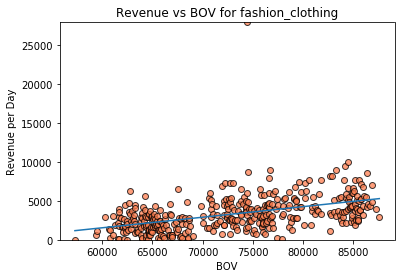

In [98]:
#BY CATEGORIES
for metric in metriclist:
    for cat in new_categories.keys():
        groupdf = mergedf.groupby([metric, 'category'])
        groupdf = groupdf.sum()
        #sum of prices
        #groupdf = groupdf.sum()
        groupdf.reset_index(inplace = True)
        #why are there sum of prices at 0? no data from those dates?
        groupdf = groupdf.loc[groupdf['price'] > 1]
        #change categories
        groupdf = groupdf.loc[groupdf['category'] == cat]

        plt.scatter(groupdf[metric], groupdf['price'], color=["coral"], edgecolor="black", alpha = 0.75,marker="o")
        plt.ylim(0, max(groupdf['price']))
        (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])
        fitBOV = slopeBOV * groupdf[metric] + interceptBOV
        plt.ylabel('Revenue per Day')
        plt.xlabel(metric)
        plt.title(f'Revenue vs {metric} for {cat}')
        print(type(metric))
        plt.plot(groupdf[metric], fitBOV)
        print(f'R2 = {rBOV**2}')
        plt.savefig('./Graphs/{metric}{cat}.png')
        plt.show()

BOV 0.3945154723112028


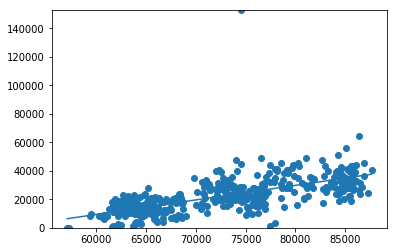

BOVdiff 0.3014741459143779


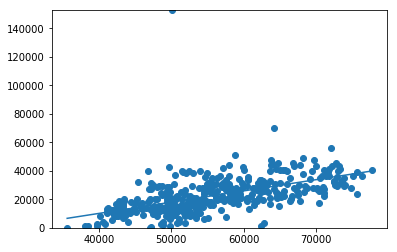

BOVma 0.21419024551505317


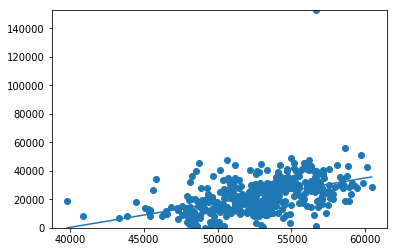

In [27]:
#ALL CATEGORIES
for metric in metriclist:
    groupdf = mergedf.groupby(metric)
    groupdf = groupdf.sum()
    groupdf.reset_index(inplace = True)
    #why are there sum of prices at 0? no data from those dates?
    groupdf = groupdf.loc[groupdf['price'] > 1]


    plt.scatter(groupdf[metric], groupdf['price'])
    plt.ylim(0, max(groupdf['price']))
    (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])

    fitBOV = slopeBOV * groupdf[metric] + interceptBOV
    print(metric, rBOV**2)
    plt.plot(groupdf[metric], fitBOV)
    plt.show()
    

In [ ]:
#used to see what the outlier point was
#groupdf.sort_values('price', ascending= False).head()

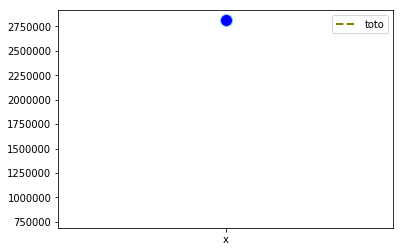

In [99]:
newgroup = mergedf.groupby(['category','month'])['price'].sum()
newgroup

category               month
appliances             01/17      4611.16
                       01/18     31172.44
                       02/17     11038.68
                       02/18     26138.97
                       03/17     23442.07
                       03/18     42187.17
                       04/17     19720.41
                       04/18     62834.02
                       05/17     11393.94
                       05/18     45988.51
                       06/17     15598.45
                       06/18     34732.67
                       07/17     11376.11
                       07/18     34224.70
                       08/17     16614.71
                       08/18     29265.18
                       09/17     16602.68
                       10/16      1707.09
                       10/17     13864.92
                       11/17     20605.22
                       12/17     12205.94
auto                   01/17      5629.53
                       01/18     36809.85
     

In [100]:
newgroup = newgroup.unstack(level=-1)


In [101]:
newgroup = newgroup[['01/17','02/17','03/17','04/17','05/17','06/17','07/17','08/17','09/17','10/17','11/17','12/17','01/18','02/18','03/18','04/18','05/18','06/18','07/18','08/18','09/18']]

#cols = list(newgroup.columns.values)
newgroup




month,01/17,02/17,03/17,04/17,05/17,06/17,07/17,08/17,09/17,10/17,...,12/17,01/18,02/18,03/18,04/18,05/18,06/18,07/18,08/18,09/18
category,,,,,,,,,,,,,,,,,,,,,
appliances,4611.16,11038.68,23442.07,19720.41,11393.94,15598.45,11376.11,16614.71,16602.68,13864.92,...,12205.94,31172.44,26138.97,42187.17,62834.02,45988.51,34732.67,34224.70,29265.18,NaN
auto,5629.53,13206.70,14578.76,15116.07,18585.04,32290.69,15456.32,18289.43,15226.07,20788.28,...,38073.47,36809.85,42330.67,45297.57,48852.83,39811.36,45337.18,43812.92,45132.97,NaN
books,284.79,980.81,2723.96,1366.37,1773.47,2281.98,1820.50,4357.18,2471.49,1573.30,...,3338.19,3904.70,3644.76,3033.40,8259.08,8871.05,5532.99,6694.84,3689.77,NaN
construction_tools,8598.65,14858.90,25133.70,22689.13,22872.78,17544.86,21543.16,26235.23,28700.46,33420.83,...,40422.00,48244.75,50323.36,49846.12,65509.44,81974.52,57330.70,57565.52,56595.88,NaN
costruction_tools_garden,NaN,579.98,NaN,1490.21,1577.24,434.69,347.58,1286.19,297.50,746.90,...,928.90,3927.98,1538.25,2497.23,1326.79,1121.27,751.45,2836.37,2808.86,NaN
costruction_tools_tools,NaN,NaN,NaN,1458.00,74.90,NaN,NaN,NaN,916.89,1018.60,...,319.50,712.10,1138.40,931.30,1332.99,417.90,527.00,5501.20,1255.77,NaN
diapers_and_hygiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.00,125.00,100.00,163.00,149.00,154.00,284.00,149.80,231.89,NaN
electronics,16677.30,28828.40,54778.85,40668.81,69807.59,51914.61,63848.35,103254.85,105862.76,126686.91,...,85318.81,138312.49,146038.25,144489.33,116926.03,109879.55,96608.63,105695.29,98888.55,NaN
fashion_clothing,16418.44,25652.25,62163.86,53536.70,87123.70,67215.07,65846.24,68060.07,82599.07,102502.49,...,113363.98,129017.15,100341.80,137677.89,130695.83,167489.85,130013.65,133099.64,106794.07,NaN


In [118]:
newgroup.drop(['09/18'], axis=1)

month,01/17,02/17,03/17,04/17,05/17,06/17,07/17,08/17,09/17,10/17,11/17,12/17,01/18,02/18,03/18,04/18,05/18,06/18,07/18,08/18
category,,,,,,,,,,,,,,,,,,,,
appliances,4611.16,11038.68,23442.07,19720.41,11393.94,15598.45,11376.11,16614.71,16602.68,13864.92,20605.22,12205.94,31172.44,26138.97,42187.17,62834.02,45988.51,34732.67,34224.70,29265.18
auto,5629.53,13206.70,14578.76,15116.07,18585.04,32290.69,15456.32,18289.43,15226.07,20788.28,34835.20,38073.47,36809.85,42330.67,45297.57,48852.83,39811.36,45337.18,43812.92,45132.97
books,284.79,980.81,2723.96,1366.37,1773.47,2281.98,1820.50,4357.18,2471.49,1573.30,3183.66,3338.19,3904.70,3644.76,3033.40,8259.08,8871.05,5532.99,6694.84,3689.77
construction_tools,8598.65,14858.90,25133.70,22689.13,22872.78,17544.86,21543.16,26235.23,28700.46,33420.83,58943.72,40422.00,48244.75,50323.36,49846.12,65509.44,81974.52,57330.70,57565.52,56595.88
costruction_tools_garden,NaN,579.98,NaN,1490.21,1577.24,434.69,347.58,1286.19,297.50,746.90,1218.50,928.90,3927.98,1538.25,2497.23,1326.79,1121.27,751.45,2836.37,2808.86
costruction_tools_tools,NaN,NaN,NaN,1458.00,74.90,NaN,NaN,NaN,916.89,1018.60,299.40,319.50,712.10,1138.40,931.30,1332.99,417.90,527.00,5501.20,1255.77
diapers_and_hygiene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.00,125.00,100.00,163.00,149.00,154.00,284.00,149.80,231.89
electronics,16677.30,28828.40,54778.85,40668.81,69807.59,51914.61,63848.35,103254.85,105862.76,126686.91,126365.48,85318.81,138312.49,146038.25,144489.33,116926.03,109879.55,96608.63,105695.29,98888.55
fashion_clothing,16418.44,25652.25,62163.86,53536.70,87123.70,67215.07,65846.24,68060.07,82599.07,102502.49,150211.53,113363.98,129017.15,100341.80,137677.89,130695.83,167489.85,130013.65,133099.64,106794.07


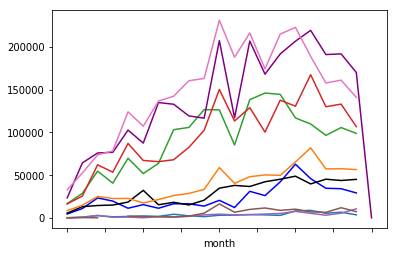

In [119]:
appliances_line = newgroup.iloc[0]
appliances_line.plot(kind='line', color='blue')

auto_line = newgroup.iloc[1]
auto_line.plot(kind='line', color ='black')

books_line = newgroup.iloc[2]
books_line.plot(kind='line')

construction_tools_line = newgroup.iloc[3]
construction_tools_line.plot(kind='line')

electronics_line = newgroup.iloc[7]
electronics_line.plot(kind='line')

fashion_clothing_line = newgroup.iloc[8]
fashion_clothing_line.plot(kind='line')

food_drink_line = newgroup.iloc[11]
food_drink_line.plot(kind='line')

home_furniture_line = newgroup.iloc[14]
home_furniture_line.plot(kind='line', color ='purple')

industry_line = newgroup.iloc[15]
industry_line.plot(kind='line')

other_line = newgroup.iloc[16]
other_line.plot(kind='line')

plt.show()